In [14]:
import pandas as pd
data_path = '../csv/expanded_dataset_v1.csv'
data = pd.read_csv(data_path)

normal_count = data[data['Class']=='normal'].count()[0]
flooding_count = data[data['Class']=='flooding'].count()[0]
slowloris_count = data[data['Class']=='slowloris'].count()[0]
print("Normal: {}, Flooding: {}, Slowloris: {}".format(normal_count, flooding_count, slowloris_count))

data = data.replace('flooding', 'attack')
data = data.replace('slowloris', 'attack')
normal_count = data[data['Class']=='normal'].count()[0]
attack_count = data[data['Class']=='attack'].count()[0]
print("Normal: {}, Attack: {}".format(normal_count, attack_count))

X = data.drop(['Class'], axis=1)
Y = data['Class']

Normal: 566, Flooding: 259, Slowloris: 197
Normal: 566, Attack: 456


In [15]:
%matplotlib inline 
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
norm = pd.DataFrame(scale(X), columns=list(X))
scaled = pd.DataFrame(minmax_scale(norm, feature_range=(-1, 1)), columns=list(X))
norm.mean()


AvgRequestNo          8.503200e-17
AvgTimeBetwReq        6.566149e-17
AvgTimeBetwRespReq    4.094083e-18
AvgDataRate           5.757517e-17
AvgPacketNo          -9.364112e-17
AvgPacketSize         2.950456e-16
AvgConcurrentReq     -9.738894e-17
MaxReq                1.803298e-17
AvgDuration           2.591969e-16
dtype: float64

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

svm = SVC(kernel='linear')
parameters = [{
    'C':[x ** y for x, y in zip([2] * 31, range(-15, 16, 1))], 
    'gamma': [x ** y for x, y in zip([2] * 31, range(-15, 16, 1))],
    'kernel': ['rbf'],
    'decision_function_shape': ['ovr']
}]

search = GridSearchCV(svm, parameters, cv=10, n_jobs=-1, verbose=1)
search.fit(scaled, Y)
accuracy = search.best_score_

print(accuracy)

Fitting 10 folds for each of 961 candidates, totalling 9610 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 4888 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 7088 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 9265 tasks      | elapsed:  1.6min


0.827788649706


[Parallel(n_jobs=-1)]: Done 9610 out of 9610 | elapsed:  1.7min finished


Populating the interactive namespace from numpy and matplotlib
[[-0.14550003  0.37711637  0.77158563  0.97300878  0.98281051  0.84395529
   0.61482584  0.35018219  0.09128874 -0.13645656 -0.32132971 -0.46118753
  -0.55925174 -0.62065892 -0.6500367  -0.6500367  -0.62065892 -0.55925174
  -0.46118753 -0.32132971 -0.13645656  0.09128874  0.35018219  0.61482584
   0.84395529  0.98281051  0.97300878  0.77158563  0.37711637 -0.14550003]
 [ 0.37711637  0.79522584  0.98773718  0.95538608  0.75287196  0.45459318
   0.12910458 -0.17404272 -0.42710005 -0.62065892 -0.75773327 -0.84791098
  -0.90277665 -0.93286355 -0.94589175 -0.94589175 -0.93286355 -0.90277665
  -0.84791098 -0.75773327 -0.62065892 -0.42710005 -0.17404272  0.12910458
   0.45459318  0.75287196  0.95538608  0.98773718  0.79522584  0.37711637]
 [ 0.77158563  0.98773718  0.94345884  0.70065489  0.35018219 -0.02273185
  -0.35712049 -0.62065892 -0.80515239 -0.91848491 -0.97669508 -0.99794535
  -0.99874851 -0.99205554 -0.98655193 -0.986551

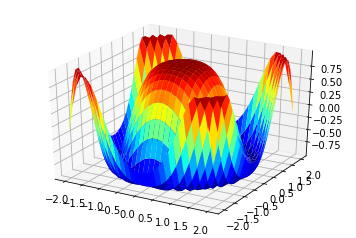

In [7]:
# This is the 3D plotting toolkit
%pylab inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
x = np.outer(np.linspace(-2, 2, 30), np.ones(30))
y = x.copy().T
z = np.cos(x ** 2 + y ** 2)
print(z)
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)

In [47]:
import pandas as pd
import numpy as np


df = pd.DataFrame(np.random.randn(5, 4))

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = df.columns
y = df.index
X,Y = np.meshgrid(x,y)

print(df)
# print(np.log10(df))
max = np.argmax(df.as_matrix())
indexes = np.unravel_index(max, (5,4))
print(indexes)
df.ix[indexes]
print(df.as_matrix().shape)

df.columns[indexes[1]]

          0         1         2         3
0 -0.227591 -0.976625 -0.231495  0.634112
1 -0.391783  0.170447 -0.406093 -0.819610
2 -1.281687  0.276953  0.160766 -0.416049
3 -1.038928  1.024877 -1.261959  1.458598
4 -1.402065  2.251065  1.438894 -1.057661
(4, 1)
(5, 4)


1